In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Загрузка данных

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\archive\data.csv', encoding='cp1251') 
df.head()

,fever,bodypain,age,runnynose,diffbreath,infected
0,99.329862,0,26,1,-1,0
1,98.115263,1,61,1,0,1
2,99.918088,1,13,0,-1,0
3,101.344456,1,55,1,0,1
4,100.056678,1,37,0,1,0


In [3]:
# fever - лихорадка, высокая температура
# bodypain - боль в теле
# age - возвраст
# runnynose - насморк
# diffbreath - дыхание
# infected - инфицирован 

# Описательная статистика

In [4]:
df.shape #размерность датасета

(1999, 6)

In [5]:
df.dtypes #тип полей

fever         float64
bodypain        int64
age             int64
runnynose       int64
diffbreath      int64
infected        int64
dtype: object

In [6]:
df.nunique() #Количество уникальных значений для каждого поля

fever         1999
bodypain         2
age             71
runnynose        2
diffbreath       3
infected         2
dtype: int64

In [7]:
df.isnull().sum() #Количество отсутсвующих значений для каждого поля

fever         0
bodypain      0
age           0
runnynose     0
diffbreath    0
infected      0
dtype: int64

In [8]:
df.describe() #описательная статистика

,fever,bodypain,age,runnynose,diffbreath,infected
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,100.512027,0.488244,47.331666,0.499250,-0.024012,0.503752
std,1.438389,0.499987,20.467449,0.500125,0.816143,0.500111
min,98.005787,0.000000,12.000000,0.000000,-1.000000,0.000000
25%,99.255045,0.000000,30.000000,0.000000,-1.000000,0.000000
50%,100.521666,0.000000,48.000000,0.000000,0.000000,1.000000
75%,101.728421,1.000000,65.000000,1.000000,1.000000,1.000000
max,102.995724,1.000000,82.000000,1.000000,1.000000,1.000000


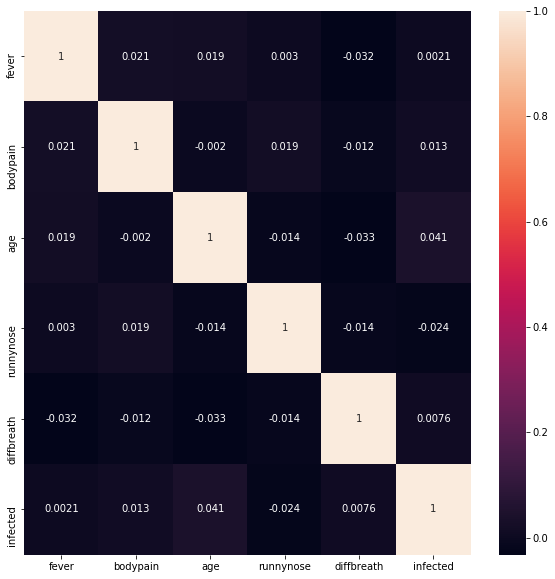

In [9]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [10]:
X = df.drop('infected', axis=1).values
y = df['infected'].values

In [11]:
#Наша задача сводится к задаче классификации: понять по симптомам человек заражен covid-19 или нет

# Разбиваем выборку

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)
print(X_train.shape, X_test.shape)

(1399, 5) (600, 5)


# Стандартизация X

In [13]:
#from sklearn.preprocessing import StandardScaler

# Масштабирование
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# KNN - Метод ближайших соседей

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Метрики

In [15]:
from sklearn.metrics import classification_report

predict_knn = knn.predict(X_test)
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.49      0.61      0.54       297
           1       0.49      0.37      0.42       303

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.49      0.49      0.48       600



In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [17]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [18]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 6}, 0.5303533026113672)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn_grid.predict(X_test))

0.47333333333333333

In [20]:
print(classification_report(y_test, knn_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.64      0.55       297
           1       0.47      0.31      0.37       303

    accuracy                           0.47       600
   macro avg       0.47      0.47      0.46       600
weighted avg       0.47      0.47      0.46       600



# Логистическая регрессия

In [21]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
predict_logit = logit.predict(X_test)
print(classification_report(y_test, predict_logit))

              precision    recall  f1-score   support

           0       0.49      0.46      0.48       297
           1       0.50      0.54      0.52       303

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



In [22]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.5224665981500514


In [23]:
predict_logreg = logreg_cv.predict(X_test)
print(classification_report(y_test, predict_logreg))

              precision    recall  f1-score   support

           0       0.48      0.43      0.45       297
           1       0.49      0.53      0.51       303

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



# Метод опорных векторов

In [24]:
from sklearn import svm
#метод опорных векторов
clf = svm.SVC(kernel='linear', C=10.0)
clf.fit(X_train, y_train)
predict_clf = clf.predict(X_test)
print(classification_report(y_test, predict_clf))

              precision    recall  f1-score   support

           0       0.49      0.46      0.48       297
           1       0.50      0.53      0.52       303

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



In [25]:
from sklearn.svm import SVC

clf2 = SVC(kernel="linear")
from sklearn.model_selection import cross_val_score, KFold

params_grid = {'C': range(1, 12)}
cv = KFold(5, shuffle=True, random_state=1)
grid = GridSearchCV(clf2, params_grid, cv=cv, n_jobs = -1, return_train_score=True)

In [26]:
%%time
grid.fit(X_train, y_train)

Wall time: 15.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': range(1, 12)}, return_train_score=True)

In [27]:
grid.best_params_

{'C': 1}

In [28]:
predict_clf = grid.predict(X_test)
print(classification_report(y_test, predict_clf))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49       297
           1       0.51      0.53      0.52       303

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



In [29]:
#выберем модель опорных векторов

# График зависимости обучающей и тестовой оценок классификатора от значения параметра C

In [30]:
def plot_grid_scores(grid, param_name):
    fig,ax = plt.subplots(figsize=(10, 10))
    ax.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'], 
           'o-', color='blue', label='train')
    ax.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'], 
           'o-', color='yellow', label='test')
    ax.set_xlabel('parameter C')
    ax.set_ylabel('Mean CV accuracy')
    ax.legend();

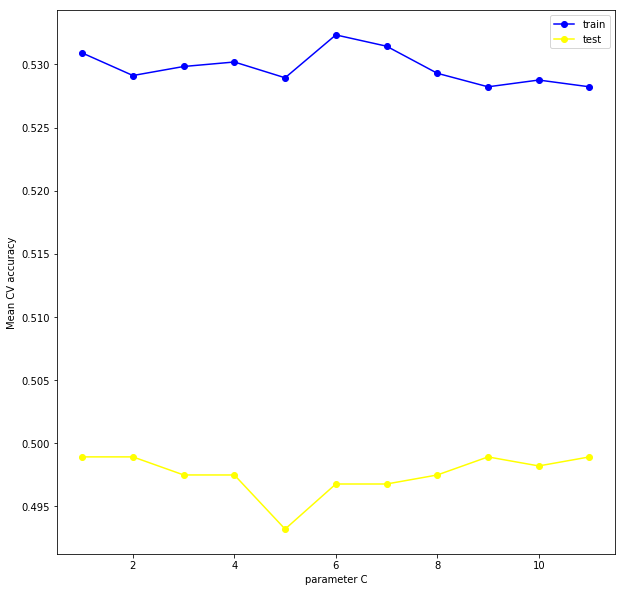

In [31]:
plot_grid_scores(grid, 'C')

# Precision-recall

In [32]:
clf_lin = SVC(kernel="linear", C=1.0, probability=True)
clf_lin.fit(X_train, y_train)

#на обучающей
print('train: ', clf_lin.score(X_train, y_train))
#на тестовой
print('test: ', clf_lin.score(X_test, y_test))

train:  0.5318084345961401
test:  0.5033333333333333


# Кривая усредненного Precision-Recall

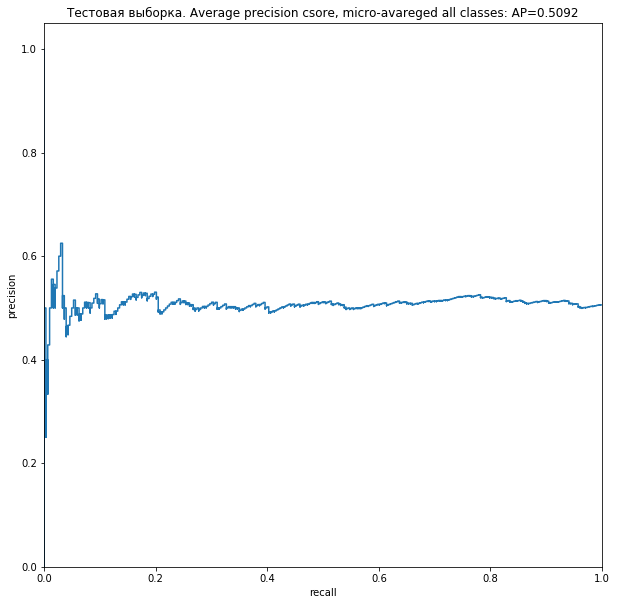

In [33]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

y_score = clf_lin.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
average_precision = average_precision_score(y_test, y_score)
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('recall')
plt.ylabel('precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Тестовая выборка. Average precision csore, micro-avareged all classes: AP={0:0.4f}'.format(average_precision))
plt.show()

# ROC-AUC

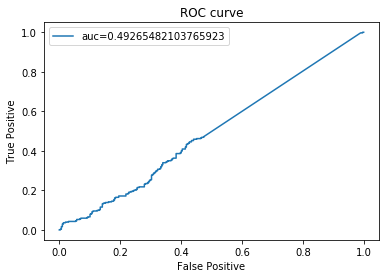

In [34]:
from sklearn import metrics
y_pred_proba = clf_lin.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc="best")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.show()

# Визуализация данных

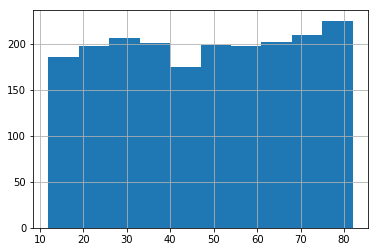

In [35]:
df['age'].hist()

In [36]:
df.loc[df['age'] < 18, 'age_category'] = "child"
df.loc[(df['age'] >= 18) & (df['age'] < 45), 'age_category'] = "young"
df.loc[(df['age'] >= 45) & (df['age'] < 65), 'age_category'] = "adult"
df.loc[df['age'] >= 65, 'age_category'] = "senior"
df.head()

,fever,bodypain,age,runnynose,diffbreath,infected,age_category
0,99.329862,0,26,1,-1,0,young
1,98.115263,1,61,1,0,1,adult
2,99.918088,1,13,0,-1,0,child
3,101.344456,1,55,1,0,1,adult
4,100.056678,1,37,0,1,0,young


In [37]:
inf = df[df.infected==1].age.count()
inf_ch = df[(df.age_category == "child") & (df.infected == 1)].age.count() / inf * 100
inf_y = df[(df.age_category == "young") & (df.infected == 1)].age.count() / inf * 100
inf_ad = df[(df.age_category == "adult") & (df.infected == 1)].age.count() / inf * 100
inf_sen = df[(df.age_category == "senior") & (df.infected == 1)].age.count() / inf * 100

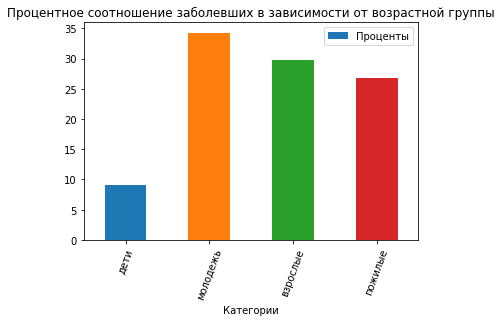

In [38]:
import matplotlib.pyplot as plot
df_marks = pd.DataFrame({'Категории':['дети', 'молодежь', 'взрослые', 'пожилые'], 'Проценты':[inf_ch, inf_y, inf_ad, inf_sen]}) #создаем новый dataframe
df_marks.plot.bar(x='Категории', y='Проценты', rot=70, title="Процентное соотношение заболевших в зависимости от возрастной группы")
plot.show()

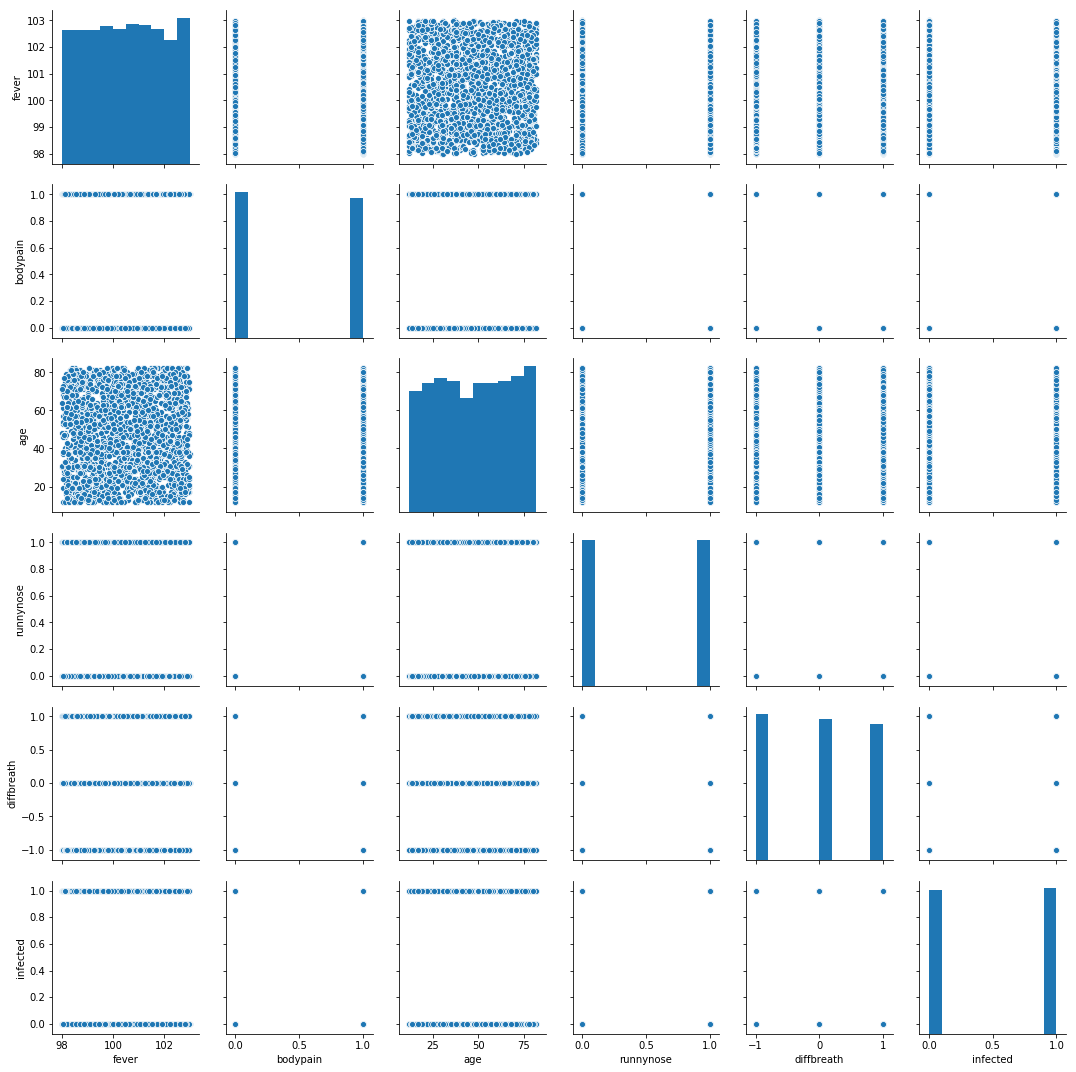

In [39]:
sns.pairplot(data=df)

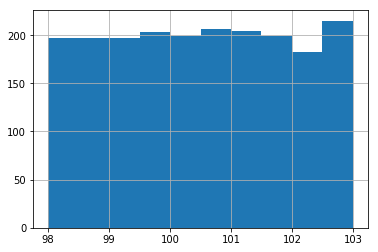

In [40]:
df['fever'].hist()

In [41]:
#Перевод температура из шкалы Фарингейта в шкалу Цельсия
df['fever_celsium']=(df.fever-32) * 5/9

In [42]:
df.round({'fever_celsium':1}).head()

,fever,bodypain,age,runnynose,diffbreath,infected,age_category,fever_celsium
0,99.329862,0,26,1,-1,0,young,37.4
1,98.115263,1,61,1,0,1,adult,36.7
2,99.918088,1,13,0,-1,0,child,37.7
3,101.344456,1,55,1,0,1,adult,38.5
4,100.056678,1,37,0,1,0,young,37.8


In [43]:
df['fever_celsium'].describe()

count    1999.000000
mean       38.062237
std         0.799105
min        36.669882
25%        37.363914
50%        38.067592
75%        38.738012
max        39.442069
Name: fever_celsium, dtype: float64

In [44]:
temp1 = df[df.fever_celsium < 38].fever.count()
temp2 = df[(df.fever_celsium < 39) & (df.fever_celsium >= 38)].fever.count()
temp3 = df[df.fever_celsium >= 39].fever.count()

inf_temp1 = df[(df.fever_celsium < 38) & (df.infected == 1)].fever.count() / temp1 * 100
inf_temp2 = df[(df.fever_celsium < 39) & (df.fever_celsium >= 38) & (df.infected == 1)].fever.count() / temp2 * 100
inf_temp3 = df[df.fever_celsium >= 39].fever.count() / temp3 * 100

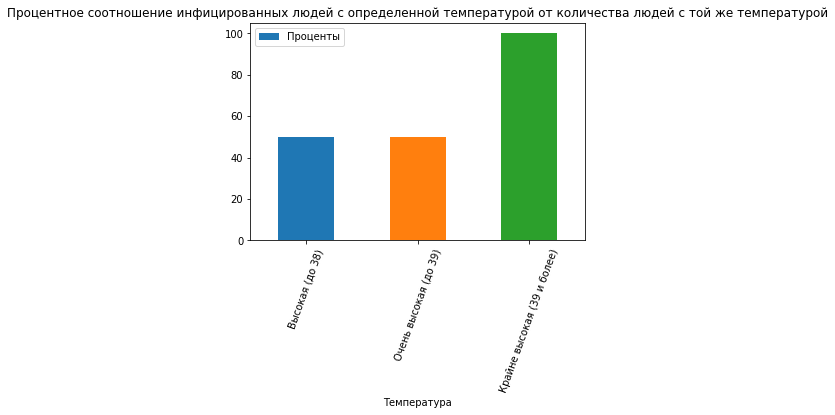

In [45]:
df_fevers = pd.DataFrame({'Температура':['Высокая (до 38)', 'Очень высокая (до 39)', 'Крайне высокая (39 и более)'], 'Проценты':[inf_temp1, inf_temp2, inf_temp3]}) #создаем новый dataframe
df_fevers.plot.bar(x='Температура', y='Проценты', rot=70, title="Процентное соотношение инфицированных людей с определенной температурой от количества людей с той же температурой")
plot.show()

In [46]:
#если у человека была температура до 39 градусов, то вероятность того, что у него covid-19 равна 50%
#если у человека была температура 39 и более градусов, то вероятность того, что у него covid-19 равна 100%

In [47]:
df.dtypes #тип полей

fever            float64
bodypain           int64
age                int64
runnynose          int64
diffbreath         int64
infected           int64
age_category      object
fever_celsium    float64
dtype: object

# Работа с категориальными данными

{0: 'adult', 1: 'child', 2: 'senior', 3: 'young'}


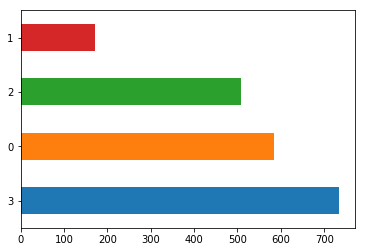

In [49]:
import sklearn
label_encoder = sklearn.preprocessing.LabelEncoder()
mapped_category = pd.Series(label_encoder.fit_transform(df['age_category']))
mapped_category.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [51]:
categorical_columns = df.columns[df.dtypes == 'object'].union(['age_category'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,fever,bodypain,age,runnynose,diffbreath,infected,age_category,fever_celsium
0,99.329862,0,26,1,-1,0,3,37.405479
1,98.115263,1,61,1,0,1,0,36.730702
2,99.918088,1,13,0,-1,0,1,37.732271
3,101.344456,1,55,1,0,1,0,38.524698
4,100.056678,1,37,0,1,0,3,37.809265


In [54]:
import category_encoders as ce
# преобразуем target-энкодером
encoder = ce.TargetEncoder()
X = df.drop(columns='infected')
y = df['infected']
encoder.fit(X, y)
X = encoder.transform(X)
X.head()

,fever,bodypain,age,runnynose,diffbreath,age_category,fever_celsium
0,99.329862,0,26,1,-1,3,37.405479
1,98.115263,1,61,1,0,0,36.730702
2,99.918088,1,13,0,-1,1,37.732271
3,101.344456,1,55,1,0,0,38.524698
4,100.056678,1,37,0,1,3,37.809265


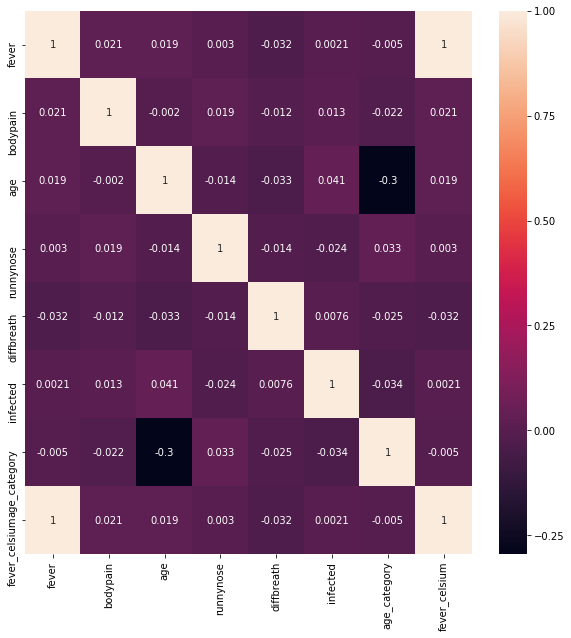

In [55]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)